In [1]:
import pandas as pd 
data = pd.read_csv("Student_Performance.csv")

In [2]:
from plotnine import *

In [14]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


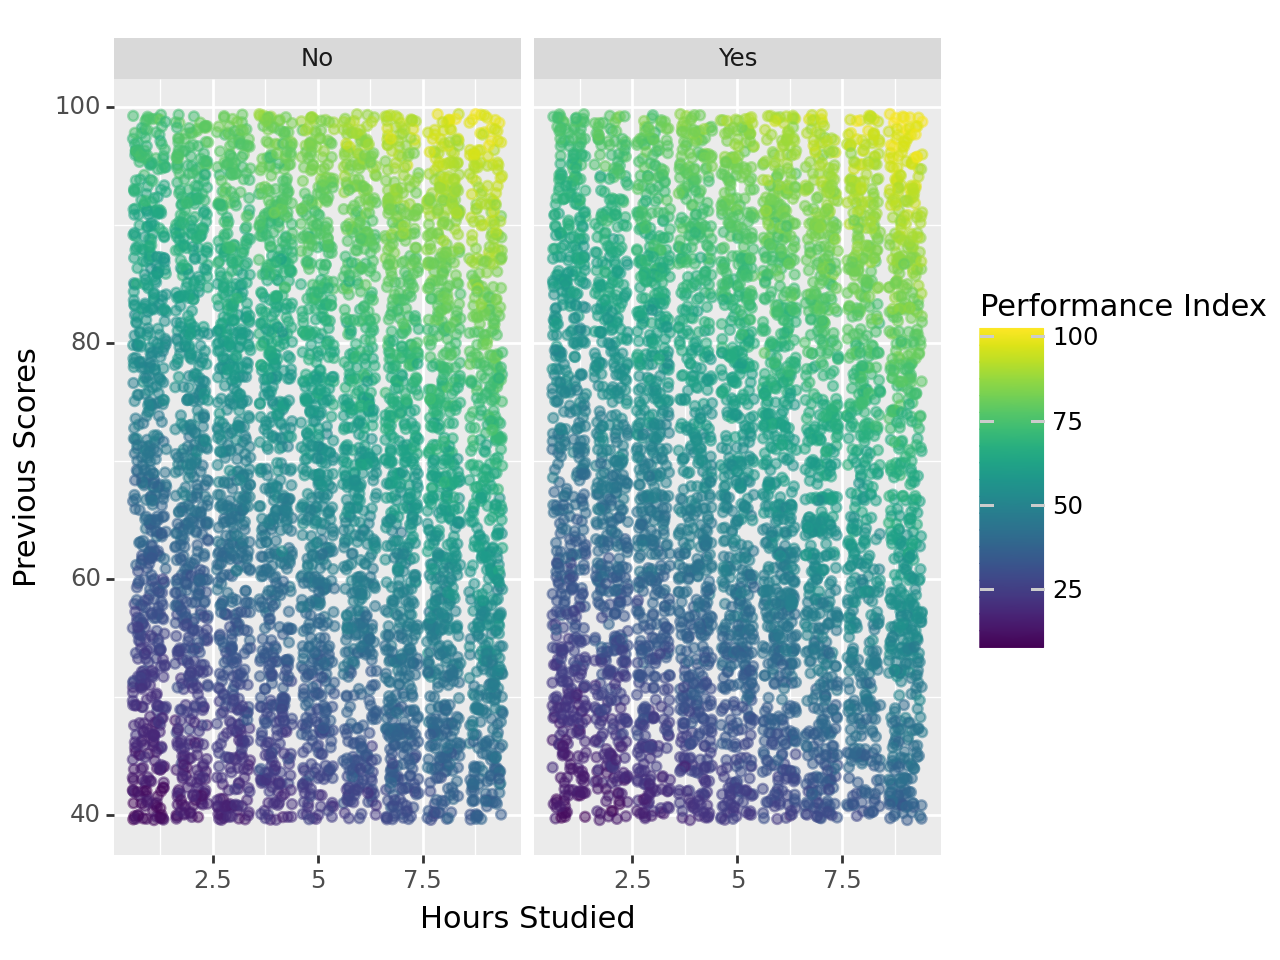

In [11]:
plt = (
    ggplot(data) 
    + aes(x='Hours Studied',y="Previous Scores",color="Performance Index")
    + geom_jitter(alpha=0.5)
    + facet_grid('~Extracurricular Activities') 
)

print(plt)

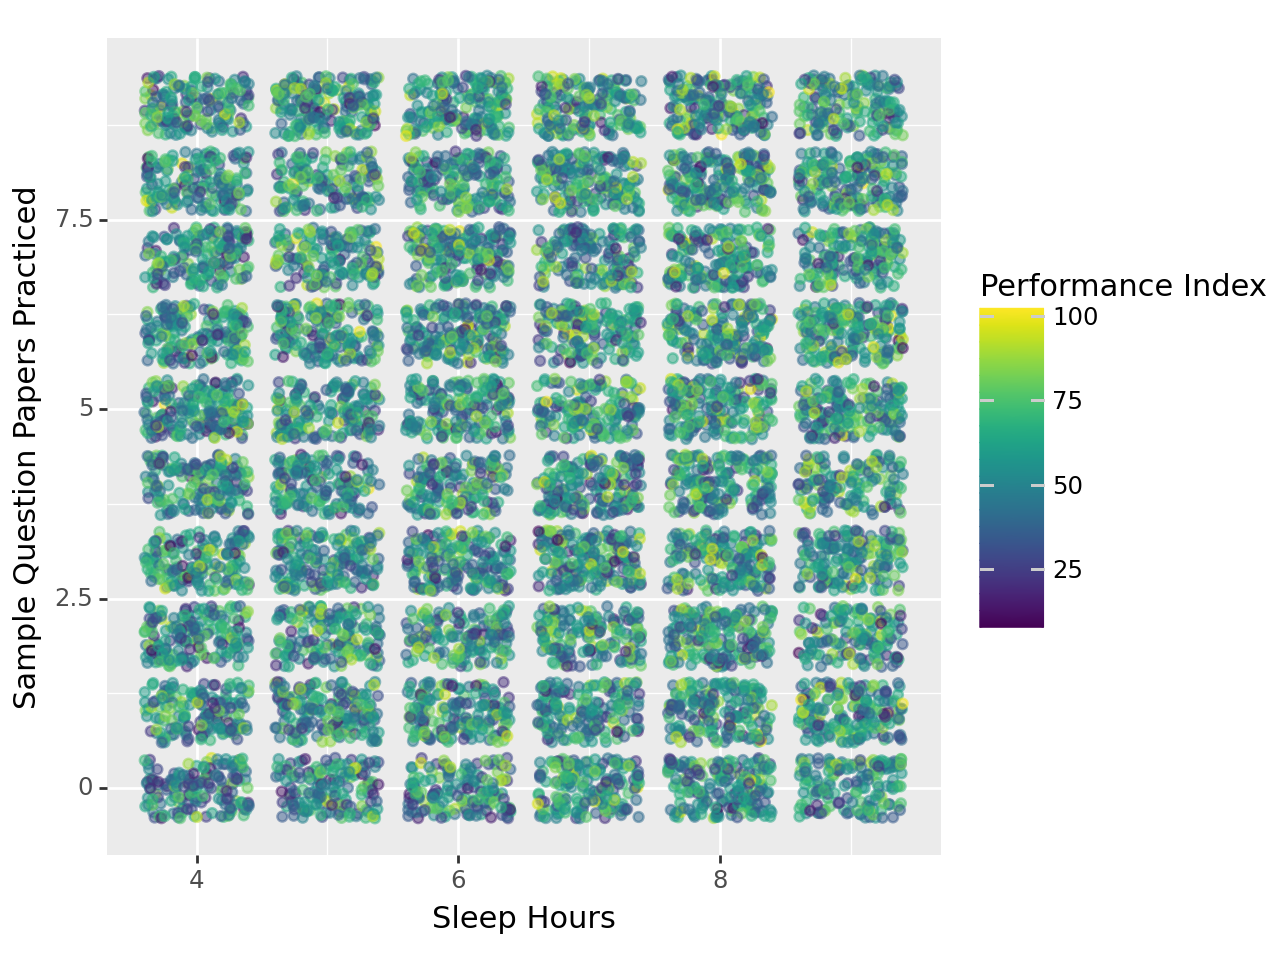

In [12]:
plt = (
    ggplot(data) +
    aes(x='Sleep Hours',y="Sample Question Papers Practiced",color="Performance Index")+
    geom_jitter(alpha=0.5) 
)

print(plt)

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data_numeric = data[["Hours Studied","Previous Scores","Sleep Hours", "Sample Question Papers Practiced","Performance Index"]]
scaler = StandardScaler()
data_num_scaled =  scaler.fit_transform(data_numeric)

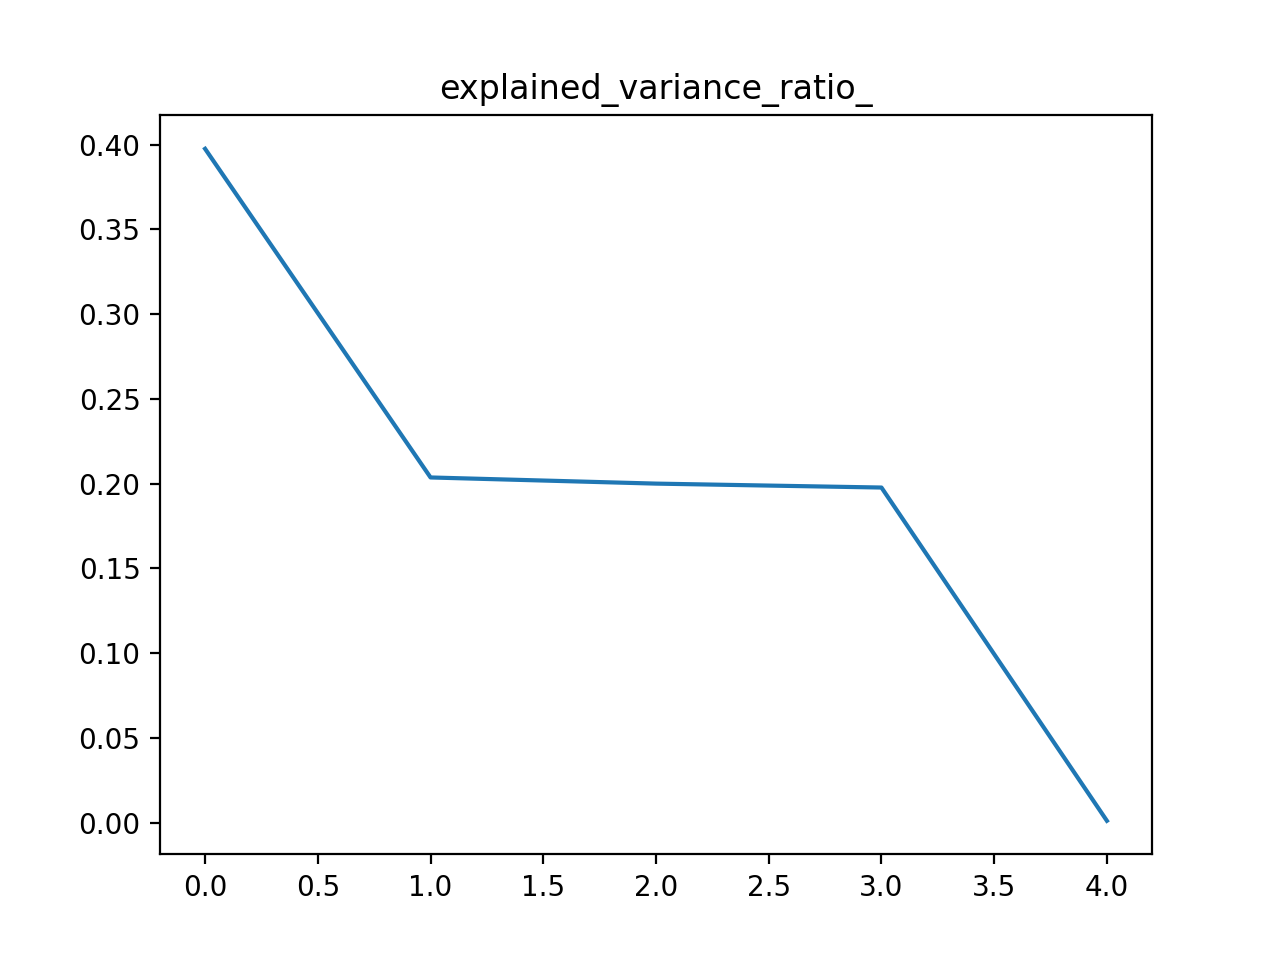

In [19]:
pca = PCA()  # Specify the number of components
pca.fit_transform(data_num_scaled)

plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.title("explained_variance_ratio_")
plt.show()

This PCA isn't that intrestring ...

[2.85289351 1.01703572 0.47331832 0.19172629]
std = 1.0359362074909855


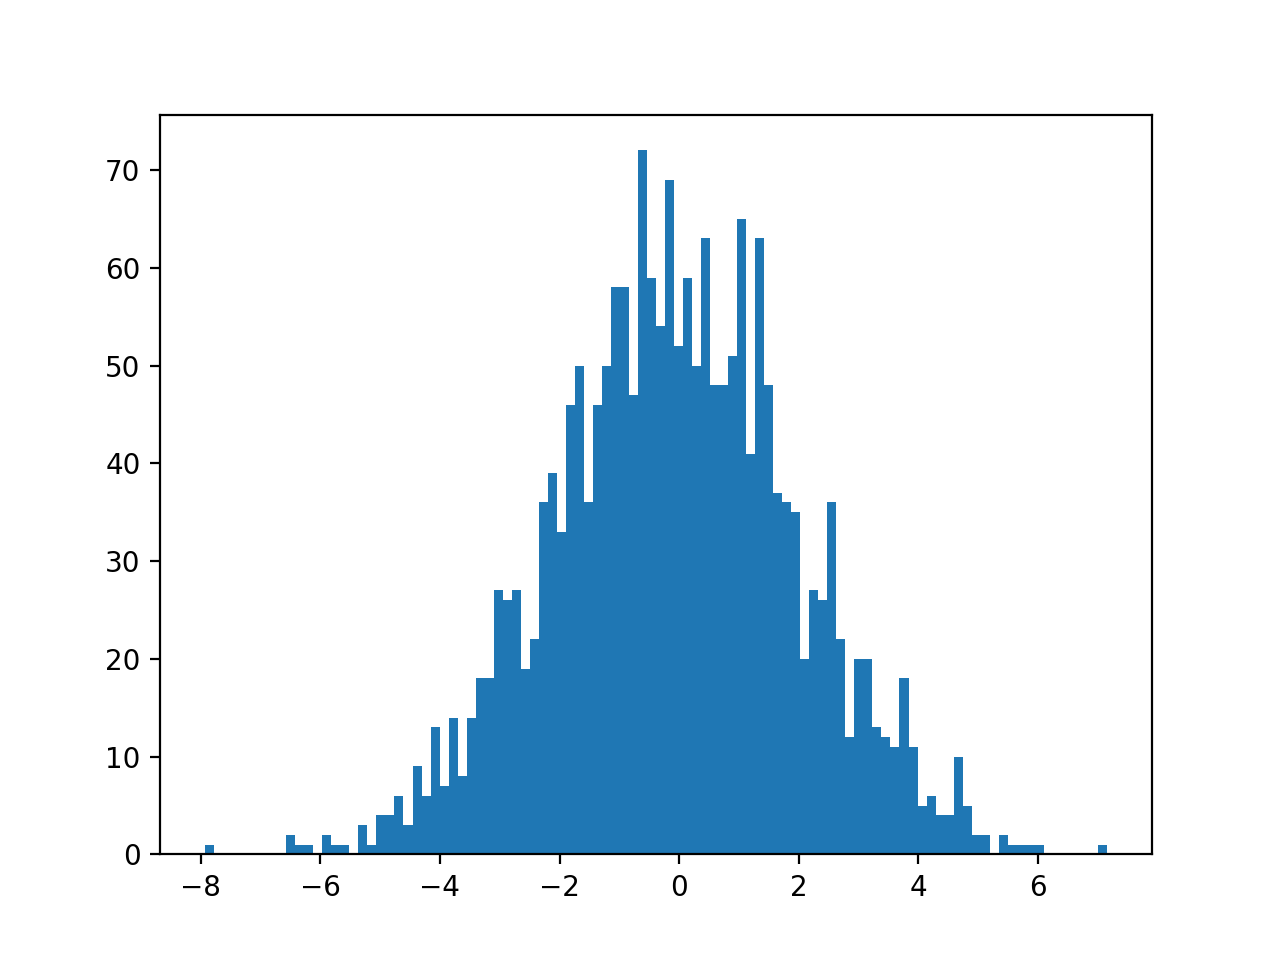

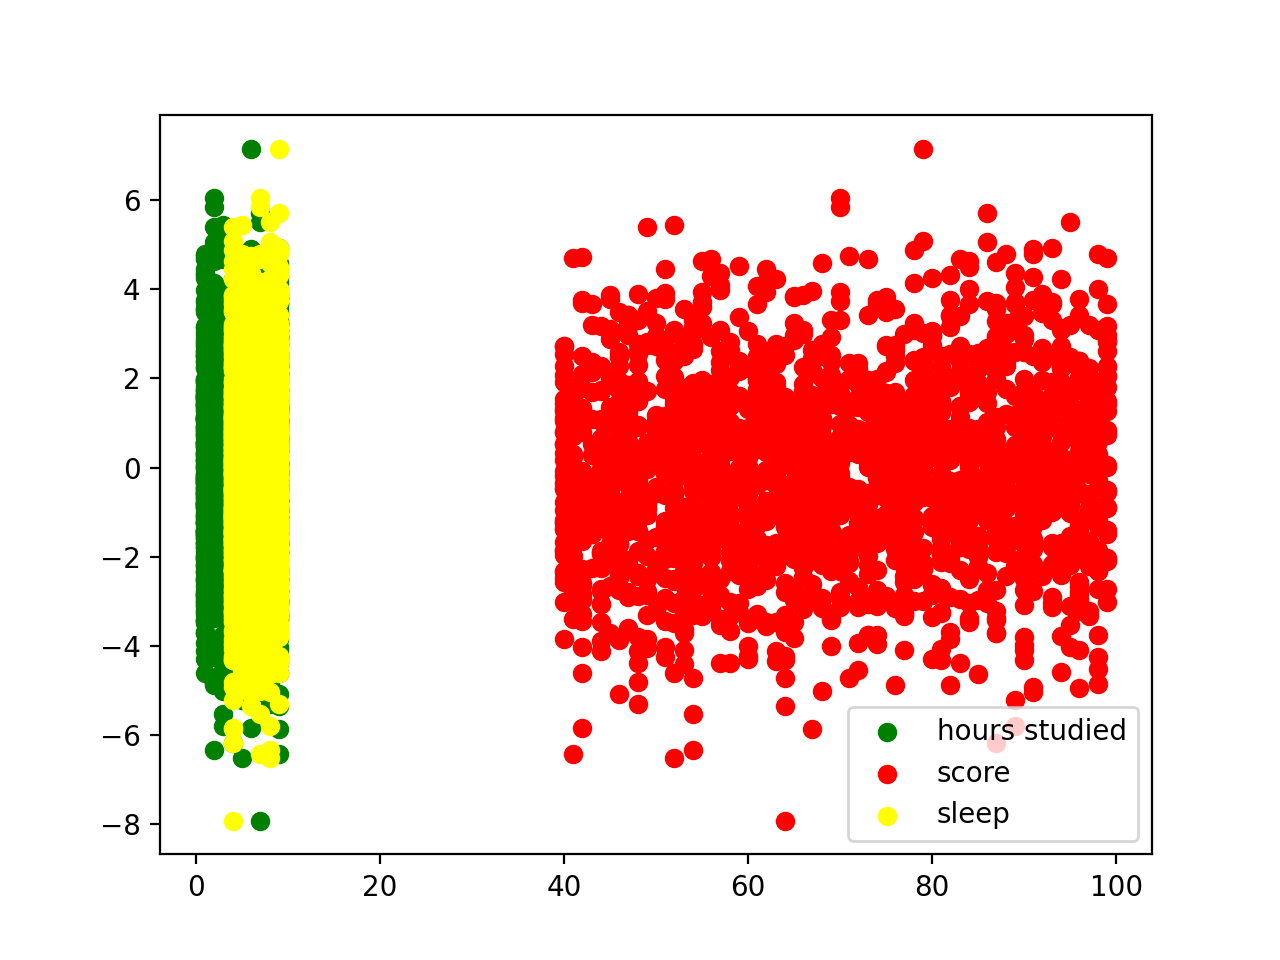

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[["Hours Studied","Previous Scores","Sleep Hours", "Sample Question Papers Practiced"]]
y = data["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(f"std = {reg.coef_.std()}")

residuals = y_test - reg.predict(X_test)

plt.hist(residuals,bins=100)
plt.show()

plt.scatter(X_test["Hours Studied"],residuals,color="green",label="hours studied")
plt.scatter(X_test["Previous Scores"],residuals,color="red",label="score")
plt.scatter(X_test["Sleep Hours"],residuals,color="yellow",label="sleep")
plt.legend()
plt.show()

